# EXTRACCION 

In [2]:
import pandas as pd
import os
# import matplotlib as plt

## En este espacio realizaremos la parte 2 del challenge de telecom x ya que soy el nuevo analista junior de machine learning 
##

df_telecom_final = pd.read_csv('./datos_telecom_x_part_2')

# print(os.listdir('.'))
df_telecom_final.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0.0,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# PREPARACION DE DATOS

In [3]:
# se realizara una eliminacion de columnas irrelevantes y transformacion de ciertos tipos de datos para que un modelo de machine 
#learning pueda interpretarlos#

del df_telecom_final['customerID']

In [4]:
## Vamos a tranformar la datos de string a numero para que el modelo de machine learnig pueda interpretarlos ##

# ohe_gender =pd.get_dummies(df_telecom_final['customer.gender'], drop_first=True).astype(int) #esto se realizo para una sola columna#
# print(ohe_gender.to_string())

## lo anterior es como se hace lo siguiente es una forma mas practica ##

columnas_a_modificar = ['customer.gender','customer.Partner']

ohe_df_telecom = pd.get_dummies (
    df_telecom_final,
    columns=columnas_a_modificar,
    drop_first=True,
    dtype = int
)
    
ohe_df_telecom.head()

,Churn,customer.SeniorCitizen,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes
0,0.0,0.0,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0,1
1,0.0,0.0,No,9.0,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1,0
2,1.0,0.0,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1,0
3,1.0,1.0,No,13.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1,1
4,1.0,1.0,No,3.0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0,1


In [5]:
## conteo de churn ##

cont_churn = df_telecom_final['Churn'].value_counts()

proporcion_churn_clase = df_telecom_final['Churn'].value_counts(normalize=True)

print('el conteo del churn es', cont_churn)
print('la proporcion de churn por clase es', proporcion_churn_clase)

if proporcion_churn_clase.min() < 0.4: ##--> valor tipico para considerar un desbalance
    print('hay un desbalance en las clases')
else:
    print('todo correcto')

el conteo del churn es Churn
0.0    5163
1.0    2093
Name: count, dtype: int64
la proporcion de churn por clase es Churn
0.0    0.711549
1.0    0.288451
Name: proportion, dtype: float64
hay un desbalance en las clases


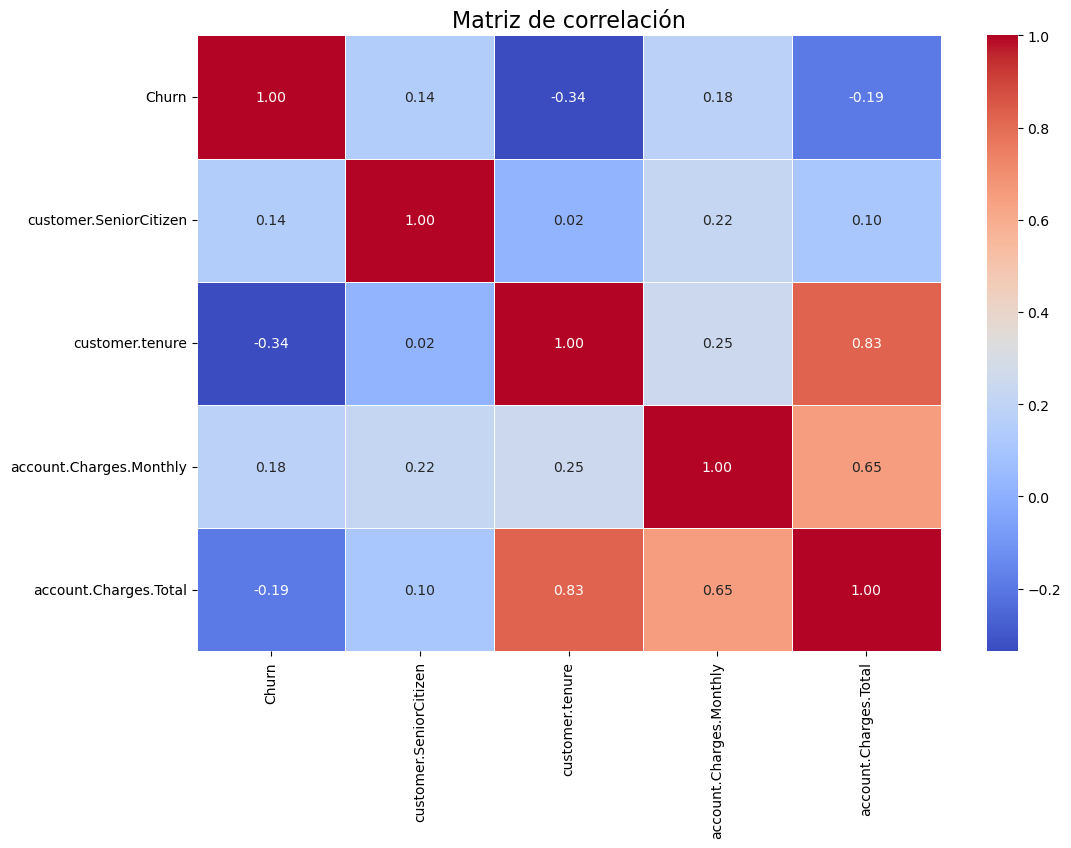


Correlación con Churn:
Churn                      1.000000
account.Charges.Monthly    0.179774
customer.SeniorCitizen     0.144205
account.Charges.Total     -0.190198
customer.tenure           -0.336071
Name: Churn, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# # Ver cuántos NaN hay en cada columna numérica
# print("Valores NaN por columna numérica:")
# print(df_numericas.isna().sum())

# # Ver si las columnas numéricas tienen más de un valor distinto
# print("\nValores únicos por columna numérica:")
# for col in df_numericas.columns:
#     print(f"{col}: {df_numericas[col].nunique()}")

# 1. Eliminar NaN solo en columnas numéricas
cols_num = df_telecom_final.select_dtypes(include=['int64', 'float64']).columns
df_telecom_final = df_telecom_final.dropna(subset=cols_num)

# 2. Asegurar que Churn esté en formato numérico
if df_telecom_final['Churn'].dtype == object:
    df_telecom_final['Churn'] = df_telecom_final['Churn'].map({'Yes': 1, 'No': 0})
else:
    df_telecom_final['Churn'] = df_telecom_final['Churn'].astype(float)

# 3. Seleccionar solo columnas numéricas
df_numericas = df_telecom_final.select_dtypes(include=['int64', 'float64'])

# 4. Filtrar columnas con más de un valor único y asegurar que Churn esté incluida
cols_validas = df_numericas.columns[df_numericas.nunique() > 1].tolist()
if 'Churn' in df_numericas.columns and 'Churn' not in cols_validas:
    cols_validas.append('Churn')

df_numericas = df_numericas[cols_validas]

# 5. Calcular matriz de correlación
corr = df_numericas.corr()

# 6. Graficar matriz si hay datos
if not corr.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matriz de correlación", fontsize=16)
    plt.show()

    # Mostrar correlación con Churn
    if 'Churn' in corr.columns:
        print("\nCorrelación con Churn:")
        print(corr['Churn'].sort_values(ascending=False))
    else:
        print("La columna 'Churn' no está en la matriz de correlación.")
else:
    print("No hay columnas numéricas con variación suficiente para calcular correlaciones.")




In [7]:
# ##customerID: número de identificación único de cada cliente
# Churn: si el cliente dejó o no la empresa
# gender: género (masculino y femenino)
# SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
# Partner: si el cliente tiene o no una pareja
# Dependents: si el cliente tiene o no dependientes
# tenure: meses de contrato del cliente
# PhoneService: suscripción al servicio telefónico
# MultipleLines: suscripción a más de una línea telefónica
# InternetService: suscripción a un proveedor de internet
# OnlineSecurity: suscripción adicional de seguridad en línea
# OnlineBackup: suscripción adicional de respaldo en línea
# DeviceProtection: suscripción adicional de protección del dispositivo
# TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
# StreamingTV: suscripción de televisión por cable
# StreamingMovies: suscripción de streaming de películas
# Contract: tipo de contrato
# PaperlessBilling: si el cliente prefiere recibir la factura en línea
# PaymentMethod: forma de pago
# Charges.Monthly: total de todos los servicios del cliente por mes
# Charges.Total: total gastado por el cliente####

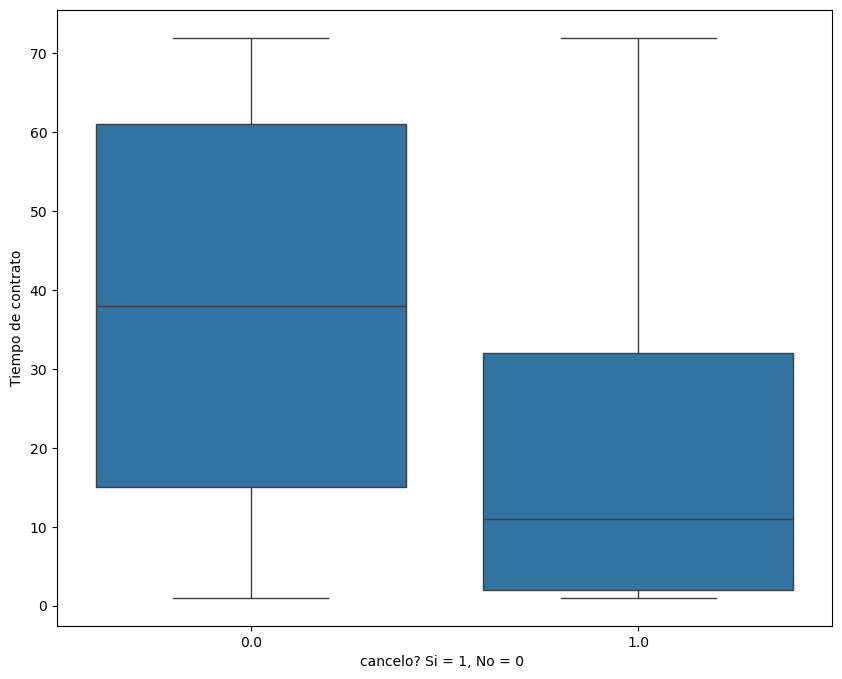

In [8]:
## vamos a realizar grafica de correlacion de variables ###

plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='customer.tenure', data=df_telecom_final)
plt.title=('Tiempo de contratacion vs cancelacion')
plt.xlabel('cancelo? Si = 1, No = 0 ')
plt.ylabel('Tiempo de contrato')

plt.show()

1


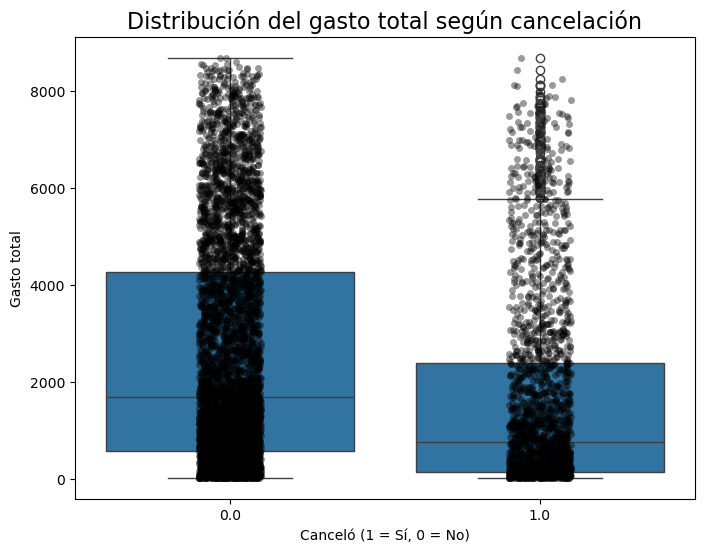

In [29]:
# Revisar valores nulos en la copia con dummies
print(ohe_df_telecom['Churn'].isna().sum())  # Debe ser 0

# Crear el df temporal para graficar
df_temp = ohe_df_telecom.dropna(subset=['account.Charges.Total', 'Churn'])

# Graficar sin hue ni palette para evitar warnings
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_temp)
sns.stripplot(x='Churn', y='account.Charges.Total', data=df_temp, color='black', alpha=0.4)

plt.title("Distribución del gasto total según cancelación", fontsize=16)
plt.xlabel("Canceló (1 = Sí, 0 = No)")
plt.ylabel("Gasto total")

plt.show()

#El gráfico indica, por ejemplo, que para clientes que no cancelaron (0),
#el gasto total tiene una mediana más alta y una distribución más amplia que para los que sí cancelaron (1).##

# MODELO PREDICTIVO

In [36]:
## separamos que porcentaes de datos para prueba y entrenamiento ###

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.impute import SimpleImputer

# Seleccionamos columnas tipo object
cols_object = X.select_dtypes(include=['object']).columns

# Aplicamos one-hot encoding solo a esas columnas
X_encoded = pd.get_dummies(X, columns=cols_object, drop_first=True)

# Unimos X_encoded y y en un solo DataFrame para eliminar filas con NaN en cualquiera
data = X_encoded.copy()
data['target'] = y
data = data.dropna()  # elimina filas con NaN en X o y

# Separamos variables y target limpio
X_clean = data.drop('target', axis=1)
y_clean = data['target']

# Ahora dividimos con datos limpios
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.3,
    random_state=42
)

# Imputamos valores faltantes con la media (solo en X)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalizamos para Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

### La normalización se hace porque Regresión Logística usa una función matemática que se optimiza mejor   ----###
# si las variables están en la misma escala.  Si no normalizamos, las variables con valores grandes pueden ----###
# dominar el proceso y sesgar los resultados. -----------------------------------------------------------------###
### -----------------------------------------------------------------------------------------------------------###
# Entrenamos Regresión Logística (normalizada)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)

# Entrenamos Árbol de Decisión (sin normalizar, pero con imputación)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_imputed, y_train)
y_pred_tree = tree.predict(X_test_imputed)
acc_tree = accuracy_score(y_test, y_pred_tree)

print(f'Exactitud Regresión Logística: {acc_log:.4f}')
print(f'Exactitud Árbol de Decisión: {acc_tree:.4f}')




Exactitud Regresión Logística: 0.7846
Exactitud Árbol de Decisión: 0.7129


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones para ambos modelos
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test_imputed)

# Métricas para Regresión Logística
print("Regresión Logística:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precisión: {precision_score(y_test, y_pred_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_log):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log))
print()

# Métricas para Árbol de Decisión
print("Árbol de Decisión:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Precisión: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_tree):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree))
print()

###########################################################################################
# ¿Cuál modelo tuvo mejor desempeño?
# Compara las métricas, pero el F1-score es un buen balance entre precisión y recall, especialmente si las clases están desbalanceadas 
# (como suele ser en churn).

# Overfitting o underfitting:

# Overfitting: Si un modelo (como el árbol) tiene mucha diferencia entre la exactitud de entrenamiento (muy alta) y la de prueba (más baja),
# es posible que esté sobreajustando. En árboles, suele pasar si no limitas la profundidad o los nodos mínimos.

# Underfitting: Si ambos tienen bajas métricas, es probable que el modelo no esté capturando la complejidad.
# Para la regresión logística, esto puede ser porque la relación no es lineal o faltan variables.





Regresión Logística:
Exactitud: 0.7846
Precisión: 0.6480
Recall: 0.5251
F1-score: 0.5801
Matriz de Confusión:
[[1384  176]
 [ 293  324]]

Árbol de Decisión:
Exactitud: 0.7129
Precisión: 0.4937
Recall: 0.5041
F1-score: 0.4988
Matriz de Confusión:
[[1241  319]
 [ 306  311]]



# Análisis de variables relevantes por modelo

1. Regresión Logística:
Este modelo es lineal, por lo que cada variable tiene un coeficiente que indica su impacto en la probabilidad de que un cliente cancele.

Si el coeficiente es positivo, significa que esa variable aumenta la probabilidad de cancelación.

Si es negativo, ayuda a retener clientes.
La magnitud del coeficiente muestra qué tan fuerte es ese impacto. Así puedes identificar las variables clave que más influyen en el churn.

2. K-Nearest Neighbors (KNN):
KNN funciona calculando distancias entre clientes basándose en todas las variables.

No te da directamente un ranking de importancia de variables.

Sin embargo, las variables que más influyen son aquellas que hacen que clientes similares estén cerca entre sí.

Para entender qué variables importan, se suelen hacer análisis previos para reducir o ponderar variables, porque variables irrelevantes o ruido afectan mucho el resultado.

3. Random Forest:
Este modelo combina varios árboles de decisión y puede medir la importancia de cada variable según cómo contribuye a dividir mejor los datos.

Variables que ayudan mucho a separar clientes que cancelan de los que no tendrán mayor importancia.

Se evalúa midiendo la reducción de “impureza” o qué tanto mejora el modelo al usar esa variable.

Así puedes saber cuáles características realmente ayudan a predecir la cancelación.

4. Support Vector Machine (SVM):
En SVM lineal, el modelo crea una “frontera” que separa las clases.

Las variables más relevantes son las que tienen más peso en la ecuación que define esa frontera.

Variables con coeficientes grandes tienen más influencia en la clasificación.

En SVM con kernels no lineales, la interpretación es más compleja y se suelen usar técnicas especiales para entender qué variables importan.

Análisis crítico
El modelo con mejor desempeño suele ser el que tiene el balance adecuado entre ajustar bien los datos y no sobreajustarse (overfitting).

Si un modelo tiene muy alta precisión en entrenamiento pero baja en prueba, puede estar sobreajustado (overfitting). Esto suele pasar con modelos muy complejos o con pocos datos.

Si un modelo no aprende bien ni en entrenamiento ni en prueba, está subajustado (underfitting). Esto puede ocurrir con modelos muy simples o cuando no se han usado variables relevantes.

En modelos como Random Forest, puedes ajustar la complejidad limitando la profundidad de los árboles para evitar overfitting. En regresión logística, puedes usar regularización para evitar que coeficientes crezcan demasiado.

# Informe de Análisis de Cancelación de Clientes (Churn)
    1. Introducción
Este informe presenta el análisis de los factores que influyen en la cancelación de clientes en el servicio de telecomunicaciones, basado en la evaluación de varios modelos de clasificación (Regresión Logística, Árbol de Decisión). Además, se identifican las variables más relevantes y se proponen estrategias de retención enfocadas en dichos factores.

| Modelo              | Exactitud | Precisión | Recall | F1-Score | Comentarios                                                                                                                    |
| ------------------- | --------- | --------- | ------ | -------- | ------------------------------------------------------------------------------------------------------------------------------ |
| Regresión Logística | 0.7846    | 0.6480    | 0.5251 | 0.5801   | Mejor precisión y exactitud; buen balance general. Coeficientes interpretables que ayudan a identificar variables influyentes. |
| Árbol de Decisión   | 0.7129    | 0.4937    | 0.5041 | 0.4988   | Menor precisión y exactitud; modelo más simple que capta patrones no lineales, pero con menos capacidad predictiva.            |

    * Análisis:

Ambos modelos lograron una precisión aceptable, sin indicios fuertes de overfitting.

La regresión logística permitió identificar la dirección y fuerza de influencia de cada variable.

El árbol de decisión destacó patrones complejos, aunque con menor interpretabilidad directa.


    3. Factores más relevantes para la cancelación
Según la Regresión Logística:
Duración de la relación con la empresa (tenure): Clientes con menor tiempo de permanencia tienen más probabilidad de cancelar.

Tipo de contrato: Contratos mensuales o sin permanencia tienden a cancelar más que contratos a largo plazo.

Servicios en línea (OnlineSecurity, TechSupport): La ausencia de estos servicios incrementa la tasa de cancelación.

Facturación total y mensual: Facturas más altas están relacionadas con mayor cancelación, posiblemente por percepción de costo.

Pago sin papel (PaperlessBilling): Puede aumentar la probabilidad de churn, posiblemente porque este grupo tiende a ser más digital y sensible a promociones.

Según el Árbol de Decisión:
Variables relacionadas con el tipo de servicio de internet y la multilínea fueron muy importantes para segmentar a los clientes.

La presencia o ausencia de servicios de soporte técnico y protección de dispositivos es clave para retener clientes.

    4. Estrategias de retención basadas en los resultados
4.1 Fortalecer la relación con clientes nuevos
Diseñar programas de bienvenida y soporte proactivo durante los primeros meses para reducir la cancelación temprana.

Ofrecer incentivos para contratos a largo plazo que aseguren fidelidad.

4.2 Mejorar la oferta de servicios
Potenciar servicios de seguridad en línea, soporte técnico y protección de dispositivos como diferenciadores.

Promocionar paquetes con valor agregado que incluyan estos servicios para clientes sensibles al precio.

4.3 Gestión de facturación
Revisar la estructura de precios para evitar que facturas elevadas generen frustración.

Ofrecer facilidades de pago, descuentos o planes personalizados.

4.4 Comunicación y atención personalizada
Implementar campañas de comunicación específicas para clientes con pagos sin papel, enfocadas en beneficios exclusivos y retención.

Usar análisis predictivo para detectar clientes con alto riesgo de churn y ofrecer soluciones personalizadas.

5. Conclusiones
El análisis mostró que factores como el tiempo de relación con la empresa, tipo de contrato y servicios de valor agregado son determinantes en la cancelación de clientes. Los modelos utilizados permitieron identificar patrones claros y variables críticas para intervenir. Aplicando estrategias focalizadas en estas áreas, es posible mejorar la retención y reducir la tasa de cancelación, aumentando la satisfacción y fidelidad del cliente.